In [13]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
%matplotlib inline
import seaborn as sns
import pandas as pd
import os
import csv

In [3]:
a= plt.figure(figsize=(10, 8))

TypeError: 'module' object is not callable

In [5]:
# Takes as input a textfile with n rows of attributes (n = number of nodes)
# Returns a list of n dictionaries
def create_attributes_dict(attributes_list):
    results_list = []
    with open('facebook100txt/{}'.format(attributes_list), 'r') as infile:
        for row in csv.DictReader(infile, delimiter='\t'):
            results_list.append(row)
    return results_list

In [6]:
# Inputs:
#     edge_list = a text file describing the links between n vertices
#     attirbutes = a list of n dictionaries describing the attributes of a given vertex
# Outputs:
#     G = a network where each node has the same attribute keys as the input attributs list

def create_network(edge_list, attributes):
    G = nx.read_edgelist('facebook100txt/' + edge_list)
    for i in range(1, G.number_of_nodes() + 1):
        attr_dict = attributes[i -1]
        for key in attr_dict.keys():
            G.node[str(i)][key] = attr_dict[key]
        return G

In [7]:
def get_degree_ratio(G):
    neighbor_self_degree_ratio_list = []
    for i in range(1, G.number_of_nodes()):
        neighbor_degree = nx.average_neighbor_degree(G)[str(i)]
        self_degree = G.degree(str(i))
        neighbor_self_degree_ratio_list.append(neighbor_degree/self_degree)
        return np.mean(neighbor_self_degree_ratio_list), self_degree, neighbor_self_degree_ratio_list

In [8]:
def run():
    # load the dataset (this can be done way more efficiently, but it doesnt take too long)
    datasets = [dataset for dataset in os.listdir('facebook100txt/') if dataset[-4:] == '.txt']    
    edges = [data for data in datasets if '_attr.txt' not in data]
    attr = [data for data in datasets if '_attr' in data]
    final_pairs = []
    for name in attr:
        data = name.split('_attr')
        if name not in os.listdir('facebook100txt/'):
            print("Couldnt find {}".format(name))
            continue
        if ''.join(data) not in os.listdir('facebook100txt/'):
            print("Couldnt find {}".format(''.join(data)))
            continue
        final_pairs.append([''.join(data), name])
    # Create each of the fb100 networks, and determine the ratio of k_v/k_u   
    network_ratios = []
    for i in range(len(final_pairs)):
        attributes = create_attributes_dict(final_pairs[i][1])
        G = create_network(final_pairs[i][0], attributes)
        ratio, k_u, _ = get_degree_ratio(G)
        # record the ratio for each network
        network_ratios.append([final_pairs[i][0], ratio, k_u])
#         print(ratio)
    return network_ratios

In [ ]:
network_ratios = run()

## Rerunning with average neighbor degree over average degree

In [ ]:
def get_degree_ratio_2(G):
    neighbor_degrees = []
    self_degrees = []
    for i in range(1, G.number_of_nodes()):
#         print(i)
        neighbor_degree = nx.average_neighbor_degree(G)[str(i)]
        neighbor_degrees.append(neighbor_degree)
        self_degree = G.degree(str(i))
        self_degrees.append(self_degree)
    avg_self_degree = np.mean(self_degrees)
    avg_neighbor_degree = np.mean(neighbor_degrees)
    ratio =  avg_neighbor_degree / avg_self_degree
    return ratio, avg_neighbor_degree, avg_self_degree

In [ ]:
def run_2():
    # load the dataset (this can be done way more efficiently, but it doesnt take too long)
    datasets = [dataset for dataset in os.listdir('facebook100txt/') if dataset[-4:] == '.txt']    
    edges = [data for data in datasets if '_attr.txt' not in data]
    attr = [data for data in datasets if '_attr' in data]
    final_pairs = []
    for name in attr:
        data = name.split('_attr')
        if name not in os.listdir('facebook100txt/'):
            print("Couldnt find {}".format(name))
            continue
        if ''.join(data) not in os.listdir('facebook100txt/'):
            print("Couldnt find {}".format(''.join(data)))
            continue
        final_pairs.append([''.join(data), name])
    # Create each of the fb100 networks, and determine the ratio of k_v/k_u   
    network_ratios = []
    for i in range(len(final_pairs)):
        attributes = create_attributes_dict(final_pairs[i][1])
        G = create_network(final_pairs[i][0], attributes)
        ratio, k_v, k_u= get_degree_ratio_2(G)
        # record the ratio for each network
        network_ratios.append([final_pairs[i][0], ratio, k_u])
        print(ratio)
    return network_ratios

In [9]:
def get_degree_ratio_3(G):
    degrees = []
    squared_degrees = []
    for i in range(1, G.number_of_nodes()):
        node_degree = G.degree(str(i))
        degrees.append(node_degree)
        squared_degrees.append(node_degree ** 2)
        
    k = np.mean(degrees)
    k_squared = np.mean(squared_degrees)
    k_v = k_squared / k
    return k_v/k, k_v, k

In [10]:
def run_3():
    # read in data.
    datasets = [dataset for dataset in os.listdir('facebook100txt/') if dataset[-4:] == '.txt']    
    edges = [data for data in datasets if '_attr.txt' not in data]
    attr = [data for data in datasets if '_attr' in data]
    final_pairs = []
    for name in attr:
        data = name.split('_attr')
        if name not in os.listdir('facebook100txt/'):
            print("Couldnt find {}".format(name))
            continue
        if ''.join(data) not in os.listdir('facebook100txt/'):
            print("Couldnt find {}".format(''.join(data)))
            continue
        final_pairs.append([''.join(data), name])
    # Create each of the fb100 networks, and determine the ratio of k_v/k_u   
    network_ratios = []
    for i in range(len(final_pairs)):
        attributes = create_attributes_dict(final_pairs[i][1])
        G = create_network(final_pairs[i][0], attributes)
        ratio, k_v, k_u= get_degree_ratio_3(G)
        # record the ratio for each network
        network_ratios.append([final_pairs[i][0], ratio, k_u])
        print(ratio)
    return network_ratios

In [11]:
network_ratios_3 = run_3()

1.81040553885
2.04621780974
2.04616396126
1.69186130724
1.93527169768
1.85853222664
1.69342655588
2.04551110348
2.02924821156
1.75057483056
1.83034104784
1.83635149025
2.1668598141
2.0651409942
2.48032231928
2.033101479
2.01067429319
1.82706218975
1.83592778691
1.88515565699
1.60444037114
1.78594622888
1.91963169435
2.02475704063
1.99995049393
1.8950881686
2.62440361169
2.18656708831
2.48407064516
2.04112411536
1.82105579883
1.91795014825
1.75428869733
1.90300362477
1.86619126982
1.72575766704
1.74604862478
2.81505404338
1.80332687621
1.71640827328
1.73468484183
1.86511718821
2.15043450692
1.86550699987
2.101519783
1.78927528239
1.50776288673
2.42445429581
1.68343671386
1.50530645356
1.5688575938
1.94523585482
2.01404207369
1.8813033492
1.97590015447
1.50897161457
2.28267184728
2.08563785527
1.73058598054
1.87405464918
1.68566845385
1.66659591799
2.13417655504
1.69347211404
1.88592085523
2.33644265816
1.77125098844
1.56822816253
1.7270953649
1.54322818619
2.24713783358
1.93597622084
1.

In [ ]:
network_ratios_3

## Running with $k_u  = \frac{2m}{n}$  and $k_v = \frac{ \langle k_u^2 \rangle}{\langle k_u \rangle}$

In [ ]:
network_ratios

$\langle k_u \rangle$ = the average degree of the current vertex.

$\langle k_v \rangle$ = the average degree of the neighboring vertex.

In [ ]:
ratios_df = pd.DataFrame(network_ratios)

   ### Plot of $\frac{\langle k_u \rangle}{\langle k_v \rangle}$ vs  $k_u$

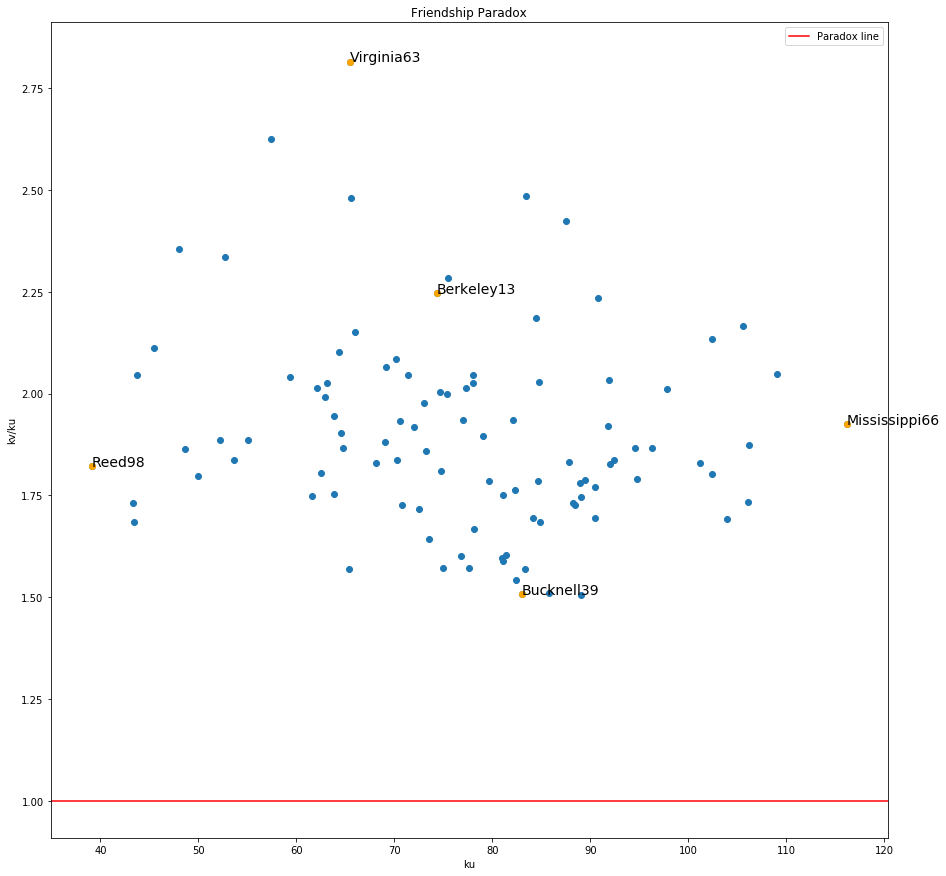

In [14]:
ratios_df = pd.DataFrame(network_ratios_3)
ratios_df.columns = ['Dataset', 'Ratio', 'k_u']


datasets_to_label = [
    'Reed98.txt',
    'Bucknell39.txt',
    'Mississippi66.txt',
    'Virginia63.txt',
    'Berkeley13.txt'
]

important_datapoints = []
for row in ratios_df.itertuples():
    if row.Dataset in datasets_to_label:
        important_datapoints.append([row.Dataset[:-4], row.Ratio, row.k_u])

        
fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(ratios_df.k_u, ratios_df.Ratio)
for row in ratios_df.itertuples():
    if row.Dataset in datasets_to_label:
        ax.scatter(row.k_u, row.Ratio, c='orange')
        ax.annotate(row.Dataset[:-4], (row.k_u, row.Ratio), fontsize=14, )

plt.xlabel('ku')
plt.ylabel('kv/ku')
plt.title('Friendship Paradox')

paradox_line=plt.axhline(y=1, color='r', label='Paradox line')

plt.legend(handles=[paradox_line])

In [ ]:
ratios_df.columns = ['Dataset', 'Ratio', 'k_u']

In [ ]:
ratios_df

In [ ]:
neighbor_degree

In [ ]:
neighbor_values = []
for value in neighbor_degree.values():
    neighbor_values.append(value)

In [ ]:
a = np.mean(neighbor_values)

In [ ]:
a

In [ ]:
paradox = 0
for row in ratios_df.itertuples():
    if row.Ratio > 1:
        paradox +=1
paradox_ratio = paradox/100
print(paradox_ratio)

In [ ]:
datasets_to_label = [
    'Reed98.txt',
    'Bucknell39.txt',
    'Mississippi66.txt',
    'Virginia63.txt',
    'Berkeley13.txt'
]

important_datapoints = []
for row in ratios_df.itertuples():
    if row.Dataset in datasets_to_label:
        important_datapoints.append([row.Dataset[:-4], row.Ratio, row.k_u])


In [ ]:
ax1 = plt.figure(figsize=(10, 6))
ax1

In [ ]:
plt.figure(figsize=(10, 6))
ax1 = plt.scatter(ratios_df.k_u, ratios_df.Ratio)
plt.xlabel('ku')
plt.ylabel('kv/ku')
plt.title('Friendship Paradox')

paradox_line=plt.axhline(y=1, color='r', label='Paradox line')
plt.legend(handles=[paradox_line])

In [ ]:
plt.figure(figsize=(10, 6))
ax1 = plt.scatter(x=ratios_df.k_u, y=ratios_df.Ratio)
plt.xlabel('ku')
plt.ylabel('kv/ku')
plt.title('Friendship Paradox')

paradox_line=plt.axhline(y=1, color='r', label='Paradox line')
plt.legend(handles=[paradox_line])

In [ ]:
from adjustText import adjust_text

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(ratios_df.k_u, ratios_df.Ratio)
for row in ratios_df.itertuples():
    if row.Dataset in datasets_to_label:
        ax.scatter(row.k_u, row.Ratio, c='orange')
        ax.annotate(row.Dataset[:-4], (row.k_u, row.Ratio), fontsize=14, )

plt.xlabel('ku')
plt.ylabel('kv/ku')
plt.title('Friendship Paradox')

paradox_line=plt.axhline(y=1, color='r', label='Paradox line')

plt.legend(handles=[paradox_line])

### Calculate $k_v$ using $\frac{\langle k_u^2 \rangle}{\langle k_u \rangle} $


## Extra Credit

In [16]:
ec_df = pd.read_csv('ec_dataframe.csv')

In [17]:
ec_df

Unnamed: 0  Diameter       MGD  Total_Nodes  Biggest_Cluster
0     American75         9  2.765969         6386             6370
1      Amherst41         7  2.403661         2235             2235
2       Auburn71         7  2.675470        18448            18448
3           BC17         9  2.791837        11509            11498
4           BU10         9  3.027827        19700            19666
5       Baylor93         7  2.667529        12803            12799
6     Berkeley13         7  2.939906        22937            22900
7      Bingham82         8  2.820404        10004            10001
8      Bowdoin47         6  2.428715         2252             2250
9     Brandeis99         7  2.490787         3898             3887
10       Brown11         9  2.696156         8600             8586
11    Bucknell39         6  2.507092         3826             3824
12         Cal65         8  2.945359        11247            11243
13     Caltech36         6  2.337848          769              762
14    Carnegie49         8  2.738067         6637             6621
15     Colgate88         6  2.456571         3482             3482
16     Columbia2         9  2.836524        11770            11706
17      Cornell5         8  2.875888        18660            18621
18    Dartmouth6         8  2.767930         7694             7677
19        Duke14         8  2.712141         9895             9885
20       Emory27         8  2.716585         7460             7449
21         FSU53         8  3.019952        27737            27731
22         GWU54         9  2.825785        12193            12164
23  Georgetown15        11  2.756883         9414             9388
24    Hamilton46         6  2.362846         2314             2312
25      Harvard1        11  2.885430        15126            15086
26   Haverford76         6  2.227866         1446             1446
27      Howard90         7  2.417404         4047             4047
28     Indiana69         8  2.961299        29747            29732
29         JMU79         7  2.829872        14070            14070
..           ...       ...       ...          ...              ...
70         UCF52         8  2.919988        14940            14936
71        UCLA26         8  3.019381        20467            20453
72        UCSB37         8  2.996594        14935            14917
73        UCSC68         8  3.028759         8991             8979
74        UCSD34         9  3.006733        14948            14936
75    UChicago30        10  2.807694         6591             6561
76       UConn91         8  2.918080        17212            17206
77          UF21         8  2.926464        35123            35111
78         UGA50         8  2.849813        24389            24380
79   UIllinois20         8  2.985425        30809            30795
80       UMass92         8  2.933625        16516            16502
81         UNC28         7  2.801360        18163            18158
82        UPenn7         9  2.864077        14916            14888
83         USC35         9  2.800827        17444            17440
84         USF51         8  3.132693        13377            13367
85       USFCA72         7  2.690907         2682             2672
86         UVA16         8  2.806389        17196            17178
87  Vanderbilt48         7  2.612954         8069             8063
88      Vassar85         8  2.462172         3068             3068
89     Vermont70         7  2.903471         7324             7322
90   Villanova62         7  2.744199         7772             7755
91    Virginia63         9  2.869331        21325            21319
92        Wake73         9  2.514147         5372             5366
93       WashU32         8  2.635222         7755             7730
94   Wellesley22         8  2.585134         2970             2970
95    Wesleyan43         7  2.552985         3593             3591
96     William77         8  2.605087         6472             6472
97    Williams40         6  2.415989         2790    

In [20]:
ec_df.columns = ("Dataset", "Diameter", "MGD", "Total_Nodes", "Biggest_Cluster")
ec_df.set_index('Dataset', inplace=True)

In [21]:
ec_df

Diameter       MGD  Total_Nodes  Biggest_Cluster
Dataset                                                       
American75           9  2.765969         6386             6370
Amherst41            7  2.403661         2235             2235
Auburn71             7  2.675470        18448            18448
BC17                 9  2.791837        11509            11498
BU10                 9  3.027827        19700            19666
Baylor93             7  2.667529        12803            12799
Berkeley13           7  2.939906        22937            22900
Bingham82            8  2.820404        10004            10001
Bowdoin47            6  2.428715         2252             2250
Brandeis99           7  2.490787         3898             3887
Brown11              9  2.696156         8600             8586
Bucknell39           6  2.507092         3826             3824
Cal65                8  2.945359        11247            11243
Caltech36            6  2.337848          769              762
Carnegie49           8  2.738067         6637             6621
Colgate88            6  2.456571         3482             3482
Columbia2            9  2.836524        11770            11706
Cornell5             8  2.875888        18660            18621
Dartmouth6           8  2.767930         7694             7677
Duke14               8  2.712141         9895             9885
Emory27              8  2.716585         7460             7449
FSU53                8  3.019952        27737            27731
GWU54                9  2.825785        12193            12164
Georgetown15        11  2.756883         9414             9388
Hamilton46           6  2.362846         2314             2312
Harvard1            11  2.885430        15126            15086
Haverford76          6  2.227866         1446             1446
Howard90             7  2.417404         4047             4047
Indiana69            8  2.961299        29747            29732
JMU79                7  2.829872        14070            14070
...                ...       ...          ...              ...
UCF52                8  2.919988        14940            14936
UCLA26               8  3.019381        20467            20453
UCSB37               8  2.996594        14935            14917
UCSC68               8  3.028759         8991             8979
UCSD34               9  3.006733        14948            14936
UChicago30          10  2.807694         6591             6561
UConn91              8  2.918080        17212            17206
UF21                 8  2.926464        35123            35111
UGA50                8  2.849813        24389            24380
UIllinois20          8  2.985425        30809            30795
UMass92              8  2.933625        16516            16502
UNC28                7  2.801360        18163            18158
UPenn7               9  2.864077        14916            14888
USC35                9  2.800827        17444            17440
USF51                8  3.132693        13377            13367
USFCA72              7  2.690907         2682             2672
UVA16                8  2.806389        17196            17178
Vanderbilt48         7  2.612954         8069             8063
Vassar85             8  2.462172         3068             3068
Vermont70            7  2.903471         7324             7322
Villanova62          7  2.744199         7772             7755
Virginia63           9  2.869331        21325            21319
Wake73               9  2.514147         5372             5366
WashU32              8  2.635222         7755             7730
Wellesley22          8  2.585134         2970             2970
Wesleyan43           7  2.552985         3593             3591
William77            8  2.605087         6472             6472
Williams40           6  2.415989         2790             2788
Wisconsin87          9  2.954991        23842            23831
Yale4                9  2.677439         8578             8561

[100 rows x 4 columns]

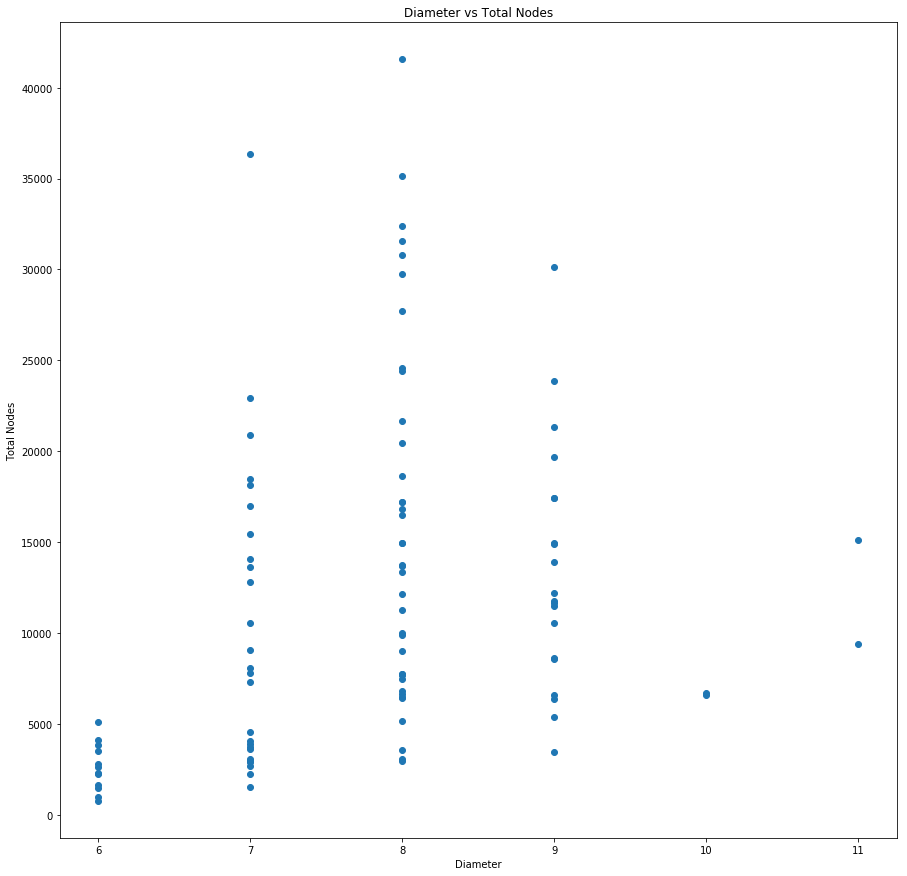

In [29]:
# Plot Diameter vs total nodes
fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(x=ec_df.Diameter, y=ec_df.Total_Nodes)

plt.ylabel('Total Nodes')
plt.xlabel('Diameter')
plt.title('Diameter vs Total Nodes')

# paradox_line=plt.axhline(y=1, color='r', label='Paradox line')



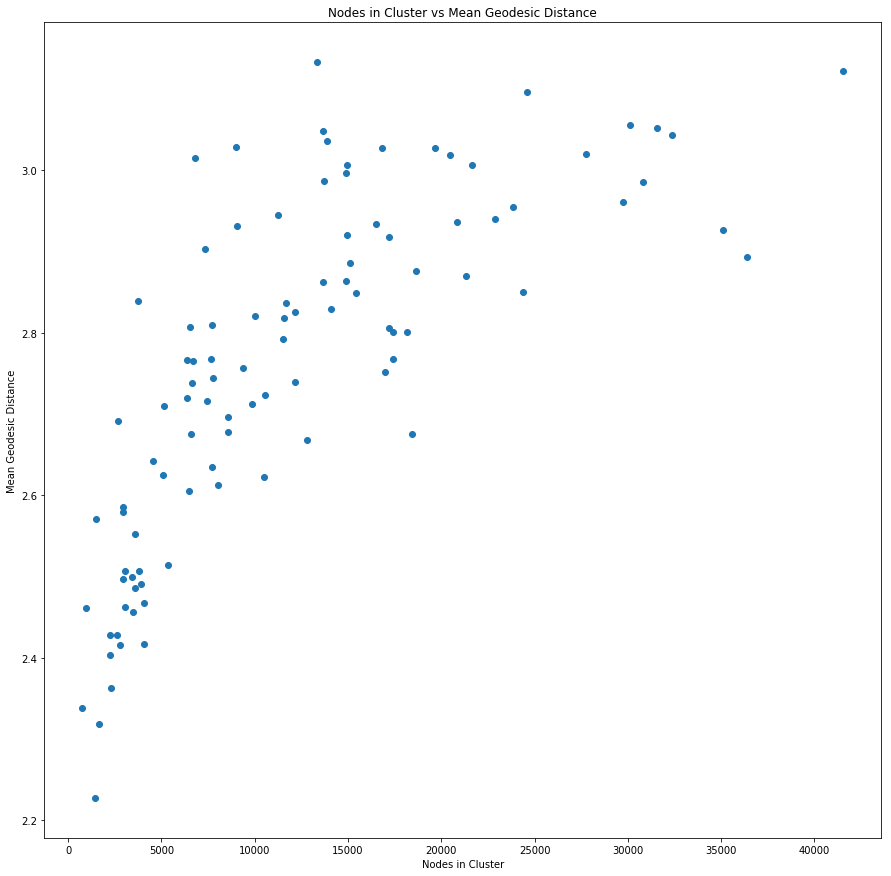

In [30]:
# Plot of cluster size vs mgd
fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(x=ec_df.Biggest_Cluster, y=ec_df.MGD)

plt.ylabel('Mean Geodesic Distance')
plt.xlabel('Nodes in Cluster')
plt.title('Nodes in Cluster vs Mean Geodesic Distance')
